## Predicting Developer Salaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("survey_results_slim.csv") 
df.info() 
#df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48019 entries, 0 to 48018
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      48019 non-null  object 
 1   Age                             48019 non-null  object 
 2   Employment                      48007 non-null  object 
 3   RemoteWork                      47940 non-null  object 
 4   EdLevel                         48019 non-null  object 
 5   LearnCode                       47935 non-null  object 
 6   LearnCodeOnline                 38414 non-null  object 
 7   YearsCode                       47950 non-null  object 
 8   YearsCodePro                    47825 non-null  object 
 9   DevType                         47904 non-null  object 
 10  OrgSize                         47982 non-null  object 
 11  Country                         48019 non-null  object 
 12  LanguageHaveWorkedWith          

In [3]:
df_cleaned = df[df['ConvertedCompYearly'].notnull()]
df_cleaned.shape[0]

48019

In [4]:
serie = df_cleaned.isnull().sum() / len(df_cleaned)*100
#print(serie)

missing_pct = serie.sort_values(ascending=True)
print(missing_pct)
print("Colonnes avec plus de 50% de données manquantes : \n", missing_pct[missing_pct > 50])

MainBranch                         0.000000
Age                                0.000000
EdLevel                            0.000000
Country                            0.000000
AISelect                           0.000000
ConvertedCompYearly                0.000000
Employment                         0.024990
OrgSize                            0.077053
YearsCode                          0.143693
RemoteWork                         0.164518
LearnCode                          0.174931
DevType                            0.239489
LanguageHaveWorkedWith             0.283221
YearsCodePro                       0.404007
OpSysPersonal use                  1.010017
NEWCollabToolsHaveWorkedWith       1.216185
OfficeStackSyncHaveWorkedWith      2.090839
TBranch                            3.879714
OpSysProfessional use              6.224619
ToolsTechHaveWorkedWith            8.255066
OfficeStackAsyncHaveWorkedWith    12.536704
DatabaseHaveWorkedWith            13.026094
LearnCodeOnline                 

In [5]:
cols_to_drop = ['AIToolCurrently Using','AIDevHaveWorkedWith']

# errors sert si on relance le code
df_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df_cleaned.shape[1]

df_cleaned.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,...,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchHaveWorkedWith,AISelect,TBranch,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",...,Asana;Basecamp;GitHub Discussions;Jira;Linear;...,Cisco Webex Teams;Discord;Google Chat;Google M...,ChatGPT,Yes,Yes,People manager,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
1,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end",...,Markdown File;Stack Overflow for Teams,Microsoft Teams;Slack;Zoom,NaN,"No, and I don't plan to",Yes,Individual contributor,23.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
2,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",...,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,NaN,"No, and I don't plan to",Yes,Individual contributor,7.0,Automated testing;Continuous integration (CI) ...,NaN,156000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,6,4,"Developer, full-stack",...,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,ChatGPT,Yes,Yes,Individual contributor,6.0,Microservices;Automated testing;Observability ...,Other,23456.0
4,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,21,21,"Developer, back-end",...,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;Google Bard AI;Neeva AI,Yes,Yes,Individual contributor,22.0,DevOps function;Microservices;Observability to...,Other,96828.0


In [6]:
# Vérification
serie_cleaned = df_cleaned.isnull().sum() / len(df_cleaned) * 100
serie_cleaned.sort_values(ascending=True, inplace=True)
print(serie_cleaned)

MainBranch                         0.000000
Age                                0.000000
EdLevel                            0.000000
Country                            0.000000
AISelect                           0.000000
ConvertedCompYearly                0.000000
Employment                         0.024990
OrgSize                            0.077053
YearsCode                          0.143693
RemoteWork                         0.164518
LearnCode                          0.174931
DevType                            0.239489
LanguageHaveWorkedWith             0.283221
YearsCodePro                       0.404007
OpSysPersonal use                  1.010017
NEWCollabToolsHaveWorkedWith       1.216185
OfficeStackSyncHaveWorkedWith      2.090839
TBranch                            3.879714
OpSysProfessional use              6.224619
ToolsTechHaveWorkedWith            8.255066
OfficeStackAsyncHaveWorkedWith    12.536704
DatabaseHaveWorkedWith            13.026094
LearnCodeOnline                 

In [7]:
# Supprimer lignes avec au moins un élément NaN (axis 0 par défaut)
df_model = df_cleaned.dropna(axis = 0) 
print("Nombre de lignes avant/après suppression : ", df_cleaned.shape[0], ",", df_model.shape[0])

Nombre de lignes avant/après suppression :  48019 , 6604


In [8]:
df_model['ConvertedCompYearly'].describe()
below10k = (df_model['ConvertedCompYearly'] < 10000).sum()
print(below10k)
above500k = (df_model['ConvertedCompYearly'] > 500000).sum()
print(above500k)

446
19


Forme du dataset original :  (6604, 31)
Forme du nouveau dataset :  (6130, 31)

Nouvelles statistiques du modèle:
count      6130.000000
mean      95649.569494
std       66065.026066
min       10057.000000
25%       49854.750000
50%       78735.500000
75%      125597.000000
max      480000.000000
Name: ConvertedCompYearly, dtype: float64


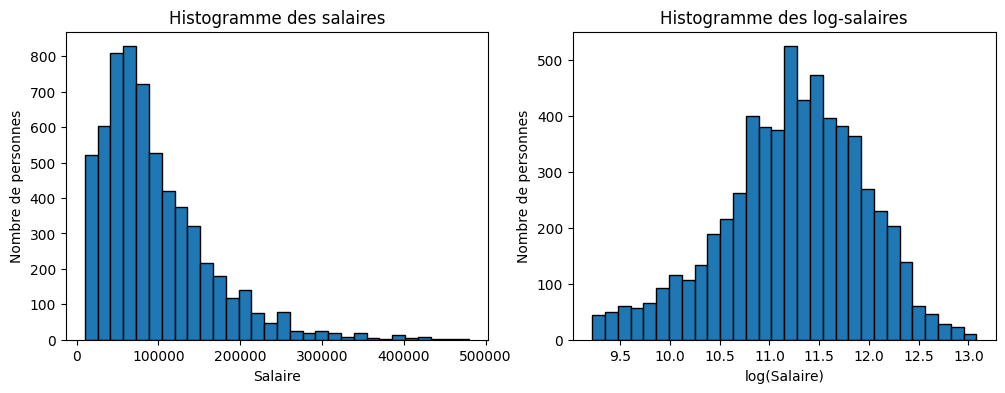

In [9]:
# Filtrer salaires annuels douteux (outliers)
df_model2 = df_model[df_model['ConvertedCompYearly'] > 10000]
df_model2 = df_model2[df_model2['ConvertedCompYearly'] < 500000]
df_model2.shape

# Filtrer pour ne pas garder les étudiants
df_model2 = df_model2[df_model2["DevType"] != "Student"]  
df_model2.shape

print("Forme du dataset original : ", df_model.shape)
print("Forme du nouveau dataset : ", df_model2.shape)
print(f"\nNouvelles statistiques du modèle:")
print(df_model2['ConvertedCompYearly'].describe())

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(df_model2['ConvertedCompYearly'], bins=30, edgecolor='black')
plt.title("Histogramme des salaires")
plt.xlabel("Salaire")
plt.ylabel("Nombre de personnes")

plt.subplot(1,2,2)
plt.hist(np.log(df_model2['ConvertedCompYearly']), bins=30, edgecolor='black')
plt.title("Histogramme des log-salaires")
plt.xlabel("log(Salaire)")
plt.ylabel("Nombre de personnes")

plt.show()

In [10]:
cols_multi_select = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith']
features = ['Num_Languages', 'Num_Databases', 'Num_Platforms', 'Num_Webframes', 'Num_Tools']

for col, feat in zip(cols_multi_select, features):
    df_model2[feat] = df_model2[col].str.count(";") + 1
    # methode alternative
    #df_model2[feat] = df_model2[col].str.split(";").str.len()

# total_skills methode 1
"""
features2 = ['Num_Databases', 'Num_Platforms', 'Num_Webframes', 'Num_Tools']
df_model2["Total_Skills"] = df_model2['Num_Languages']
for feat in features2:
    df_model2["Total_Skills"] = df_model2["Total_Skills"] + df_model2[feat]
"""
# methode 2
df_model2["Total_Skills"] = df_model2[features].sum(axis=1)
print(df_model2.shape)
df_model2.head()

#correlation au salaire
df_model2[['Total_Skills', 'ConvertedCompYearly']].corr()

(6130, 37)


,Total_Skills,ConvertedCompYearly
Total_Skills,1.000000,0.042373
ConvertedCompYearly,0.042373,1.000000


In [11]:
df_model2.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,...,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly,Num_Languages,Num_Databases,Num_Platforms,Num_Webframes,Num_Tools,Total_Skills
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",...,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0,3,1,3,4,7,18
12,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,15,10,"Developer, back-end",...,15.0,Microservices;Automated testing;Observability ...,"Manufacturing, Transportation, or Supply Chain",107090.0,11,11,2,3,12,39
16,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,24,14,"Developer, full-stack",...,14.0,Observability tools;Continuous integration (CI...,"Information Services, IT, Software Development...",75010.0,3,2,4,3,6,18
27,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,10,7,"Developer, back-end",...,7.0,DevOps function;Microservices;Observability to...,Other,53545.0,6,6,3,3,8,26
30,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,33,15,"Developer, full-stack",...,39.0,DevOps function,"Manufacturing, Transportation, or Supply Chain",130000.0,5,3,1,5,2,16


In [12]:
seuil = 30 # seuil au dessus duquel on va garder les technologies

for cols in cols_multi_select:
    df_model2[cols] = df_model2[cols].fillna("").astype(str)
    counts = df_model2[cols].str.split(";").explode().value_counts()
    pourcentages = counts / len(df_model2) * 100
    summary = pd.DataFrame({'count': counts, 'percentage': pourcentages})
    #print(summary)
    #print(summary['percentage'])
    summary = summary[summary['percentage'] > seuil]
    for i in summary.index:
        df_model2[i] = df_model2[cols].str.contains(i, regex=False).astype(int) #regex car avertissement caractères spéciaux type C#

df_model2.head()
df_model3 = df_model2.drop(columns = cols_multi_select)
df_model3.head()
#df_model3.columns.tolist()

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,...,Google Cloud,React,Node.js,Docker,npm,Homebrew,Kubernetes,Pip,Yarn,Webpack
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",...,0,1,0,1,1,0,1,1,1,1
12,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,15,10,"Developer, back-end",...,0,0,0,1,1,0,1,0,1,1
16,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,24,14,"Developer, full-stack",...,0,0,1,1,1,0,0,0,0,0
27,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,10,7,"Developer, back-end",...,0,0,1,1,1,0,0,1,0,0
30,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,33,15,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(df_model3['Age'].unique())
print(df_model3['EdLevel'].unique())

['25-34 years old' '35-44 years old' '55-64 years old' '18-24 years old'
 '45-54 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']
['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' 'Something else'
 'Associate degree (A.A., A.S., etc.)' 'Primary/elementary school']


In [14]:
from sklearn.preprocessing import OrdinalEncoder
"""
# cet encoder respecte pas l'ordre logique des âges mais l'ordre de lecture dans le dataset
# encoder = OrdinalEncoder()

# respecte l'ordre si on impose categories
encoder_age = OrdinalEncoder(categories=[['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older','Prefer not to say']])
df_model3['age_numeric'] = encoder_age.fit_transform(df_model3[['Age']])
# double crochet ou value.reshape car fit_transform attend une structure 2D (matrice)
# df_model3['age_numeric'] = encoder.fit_transform(df_model3['Age'].values.reshape(-1, 1))

encoder_ed = OrdinalEncoder(categories=[['Primary/elementary school','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Some college/university study without earning a degree','Associate degree (A.A., A.S., etc.)','Bachelor’s degree (B.A., B.S., B.Eng., etc.)','Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','Professional degree (JD, MD, Ph.D, Ed.D, etc.)','Something else']])
df_model3['edlevel_numeric'] = encoder_ed.fit_transform(df_model3[['EdLevel']])
"""
# Méthode 2 : un seul encoder pour plusieurs colonnes à la fois
encoder = OrdinalEncoder(categories=[
    ['Under 18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older','Prefer not to say'],
    ['Primary/elementary school',
     'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
     'Some college/university study without earning a degree',
     'Associate degree (A.A., A.S., etc.)',
     'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
     'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
     'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
     'Something else']
])

df_model3[['age_numeric', 'edlevel_numeric']] = encoder.fit_transform(df_model3[['Age','EdLevel']])

# mon propre encoder ordinal pour age
dictionnaire = {
    'Under 18 years old' : 0,
    '18-24 years old' : 1,
    '25-34 years old' : 2,
	'35-44 years old' : 3,
	'45-54 years old' : 4,
    '55-64 years old' : 5,
    '65 years or older' : 6,
    'Prefer not to say' : 7
}

df_model3['age_numeric2'] = df_model3['Age'].map(dictionnaire)

df_model3[['Age', 'age_numeric', 'age_numeric2', 'EdLevel', 'edlevel_numeric']].head(20)

df_model4 = df_model3.drop(['Age', 'age_numeric2', 'EdLevel'], axis=1)

In [15]:
df_model4['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired'], dtype=object)

In [16]:
# On crée 4 bins (class): Full-time, Part-time, Freelancer / Independent contractorn, Retired
# On considère que le dernier emploi correspond à la situation actuelle 

# Méthode avec fonction apply
def simplify_employment(x):
    last = x.split(";")[-1].lower()
    if "full-time" in last:
        return "Full-time"
    elif "part-time" in last:
        return "Part-time"
    elif "independent" in last:
        return "Freelancer"
    elif "retired" in last:
        return "Retired"

df_model4["Employment2"] = df_model4["Employment"].apply(simplify_employment)


# Méthode sans fonction apply

result = []

for val in df_model4["Employment"]:
    last = val.split(";")[-1].lower()
    if "full-time" in last:
        result.append("Full-time")
    elif "part-time" in last:
        result.append("Part-time")
    elif "independent" in last:
        result.append("Freelancer")
    elif "retired" in last:
        result.append("Retired")

df_model4["Employment3"] = result

encoder = OrdinalEncoder(categories= [["Full-time", "Part-time", "Freelancer", "Retired"]])
df_model4["Employment_numeric"] = encoder.fit_transform(df_model4[["Employment3"]]) 

print(df_model4[['Employment', 'Employment2', 'Employment3', 'Employment_numeric']].head(20))


df_model5 = df_model4.drop(['Employment', 'Employment2', 'Employment3'], axis=1)


                                            Employment Employment2  \
0                                  Employed, full-time   Full-time   
12                                 Employed, full-time   Full-time   
16                                 Employed, full-time   Full-time   
27                                 Employed, full-time   Full-time   
30                                 Employed, full-time   Full-time   
57   Employed, full-time;Independent contractor, fr...   Part-time   
64                                 Employed, full-time   Full-time   
65                                 Employed, full-time   Full-time   
69                                 Employed, full-time   Full-time   
71   Independent contractor, freelancer, or self-em...  Freelancer   
82   Independent contractor, freelancer, or self-em...  Freelancer   
85   Employed, full-time;Independent contractor, fr...  Freelancer   
92   Employed, full-time;Independent contractor, fr...  Freelancer   
96                  

In [17]:
df_model5['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies'],
      dtype=object)

In [48]:
# one-hot encoder

df_model5.drop(['MainBranch_dev', 'MainBranch_dev2', 'MainBranch_notdev', 'MainBranch_notdev2'], axis=1, errors='ignore', inplace=True)
# avec str.contains
df_model5['MainBranch_dev'] = df_model5['MainBranch'].str.contains("profession").astype(int)
df_model5['MainBranch_notdev'] = df_model5['MainBranch'].str.contains("sometimes").astype(int)

# avec get_dumies
dummies = pd.get_dummies(df_model5['MainBranch']).astype(int)
dummies.columns = ['MainBranch_dev2', 'MainBranch_notdev2']
df_model5 = pd.concat([df_model5, dummies], axis=1)

df_model5[['MainBranch_dev', 'MainBranch_dev2', 'MainBranch_notdev', 'MainBranch_notdev2']].head(50)

df_model6 = df_model5.drop(['MainBranch', 'MainBranch_dev2', 'MainBranch_notdev2'], axis=1)

df_model6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6130 entries, 0 to 48017
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RemoteWork                      6130 non-null   object 
 1   LearnCode                       6130 non-null   object 
 2   LearnCodeOnline                 6130 non-null   object 
 3   YearsCode                       6130 non-null   object 
 4   YearsCodePro                    6130 non-null   object 
 5   DevType                         6130 non-null   object 
 6   OrgSize                         6130 non-null   object 
 7   Country                         6130 non-null   object 
 8   MiscTechHaveWorkedWith          6130 non-null   object 
 9   NEWCollabToolsHaveWorkedWith    6130 non-null   object 
 10  OpSysPersonal use               6130 non-null   object 
 11  OpSysProfessional use           6130 non-null   object 
 12  OfficeStackAsyncHaveWorkedWith  6130 n

In [49]:
print(df_model6['RemoteWork'].unique())
print('')
#print(df_model6['AISearchHaveWorkedWith'].unique())
print('')
print(df_model6['AISelect'].unique())
print('')
print(df_model6['Industry'].unique())

['Remote' 'Hybrid (some remote, some in-person)' 'In-person']


['Yes' "No, and I don't plan to" 'No, but I plan to soon']

['Information Services, IT, Software Development, or other Technology'
 'Manufacturing, Transportation, or Supply Chain' 'Other'
 'Retail and Consumer Services' 'Healthcare' 'Financial Services'
 'Oil & Gas' 'Insurance' 'Legal Services' 'Higher Education'
 'Advertising Services' 'Wholesale']


In [50]:
"""
# Méthode plus directe

# One-hot encode directement dans df_model6 et renommer certaines colonnes si nécessaire
df_model6 = pd.get_dummies(df_model6, columns=['RemoteWork','AISelect','Industry'])

# Exemple de renommage précis après encodage
df_model6 = df_model6.rename(columns={
    'RemoteWork_Remote': 'Remote',
    'RemoteWork_Hybrid (some remote, some in-person)': 'Hybrid',
    'RemoteWork_In-person': 'In-person',
    'AISelect_Yes': 'Yes',
    'AISelect_No, but I plan to soon': 'PlanTo',
    'AISelect_No, and I don\'t plan to': 'No'
})

"""

df_model6.drop(['Hybrid', 'In_person', 'Remote', 'No', 'PlanTo','Yes', 'Advertising', 'Financial', 'Healthcare', 'HigherEd', 'IT', 'Insurance', 'Legal', 'Manufacturing', 'OilGas', 'Other_industry', 'Retail', 'Wholesale'], axis=1, errors='ignore', inplace=True)

dumies1 = pd.get_dummies(df_model6['RemoteWork']).astype(int)
#print(dumies1.columns) 
dumies1.columns = ['Hybrid', 'In_person', 'Remote']

dumies2 = pd.get_dummies(df_model6['AISelect']).astype(int)
#print(dumies2.columns) 
dumies2.columns = ['No', 'PlanTo', 'Yes']

dumies3 = pd.get_dummies(df_model6['Industry']).astype(int)
#print(dumies3.columns)
dumies3.columns = ['Advertising', 'Financial', 'Healthcare', 'HigherEd', 'IT', 'Insurance', 'Legal', 'Manufacturing', 'OilGas', 'Other_industry', 'Retail', 'Wholesale']

df_model6 = pd.concat([df_model6, dumies1, dumies2, dumies3], axis=1)

#print(df_model6[['RemoteWork','Remote','Hybrid','In_person', 'AISelect','Yes','PlanTo','No']].head(20))
# print(df_model6[['Industry','Advertising', 'Financial', 'Healthcare', 'HigherEd', 'IT', 'Insurance', 'Legal', 'Manufacturing', 'OilGas', 'Other_industry', 'Retail', 'Wholesale']].head())

df_model7 = df_model6.drop(['RemoteWork', 'AISelect', 'Industry'],axis=1)

df_model7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6130 entries, 0 to 48017
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LearnCode                       6130 non-null   object 
 1   LearnCodeOnline                 6130 non-null   object 
 2   YearsCode                       6130 non-null   object 
 3   YearsCodePro                    6130 non-null   object 
 4   DevType                         6130 non-null   object 
 5   OrgSize                         6130 non-null   object 
 6   Country                         6130 non-null   object 
 7   MiscTechHaveWorkedWith          6130 non-null   object 
 8   NEWCollabToolsHaveWorkedWith    6130 non-null   object 
 9   OpSysPersonal use               6130 non-null   object 
 10  OpSysProfessional use           6130 non-null   object 
 11  OfficeStackAsyncHaveWorkedWith  6130 non-null   object 
 12  OfficeStackSyncHaveWorkedWith   6130 n

In [51]:
#print(df_model7['DevType'].unique())
print(df_model7['DevType'].value_counts())
print('')
#print(df_model6['AISearchHaveWorkedWith'].unique())
print('')
#print(df_model7['Country'].unique())
print(df_model7['Country'].value_counts())

DevType
Developer, full-stack                            2681
Developer, back-end                              1308
Developer, front-end                              266
Engineering manager                               232
Developer, desktop or enterprise applications     178
Other (please specify):                           171
Senior Executive (C-Suite, VP, etc.)              166
DevOps specialist                                 154
Data scientist or machine learning specialist     136
Developer, mobile                                 117
Engineer, data                                    114
Cloud infrastructure engineer                      99
Research & Development role                        87
Developer, embedded applications or devices        55
Engineer, site reliability                         44
Project manager                                    34
Academic researcher                                33
Developer, QA or test                              32
Developer, game or g

In [52]:
# Créer une colonne avec les clusters DevType
def map_devtype(x):
    if 'full-stack' in x.lower():
        return 'Full-stack'
    elif 'back-end' in x.lower():
        return 'Back-end'
    elif 'front-end' in x.lower():
        return 'Front-end'
    elif any(k in x.lower() for k in ['mobile','desktop','embedded','game']):
        return 'Mobile/Desktop/Embedded'
    elif any(k in x.lower() for k in ['data','machine learning','devops','cloud','site reliability']):
        return 'Data/ML/DevOps'
    elif any(k in x.lower() for k in ['manager','c-suite','product','project']):
        return 'Manager/Exec/PM'
    else:
        return 'Other'

df_model7['DevType_group'] = df_model7['DevType'].apply(map_devtype)

print(df_model7['DevType_group'].value_counts())


DevType_group
Full-stack                 2681
Back-end                   1308
Data/ML/DevOps              568
Other                       468
Manager/Exec/PM             460
Mobile/Desktop/Embedded     379
Front-end                   266
Name: count, dtype: int64


In [53]:
# Supprimer les anciennes colonnes dummies si elles existent
# df_model7 = df_model7.drop(columns=[c for c in df_model7.columns if c.startswith('DevType_')], errors='ignore')

# Créer les dummies pour DevType_group
dummies = pd.get_dummies(df_model7['DevType_group'], prefix='DevType').astype(int)

# Concaténer seulement les dummies
df_model7 = pd.concat([df_model7, dummies], axis=1)
df_model7.head()

,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,OrgSize,Country,MiscTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysPersonal use,...,Retail,Wholesale,DevType_group,DevType_Back-end,DevType_Data/ML/DevOps,DevType_Front-end,DevType_Full-stack,DevType_Manager/Exec/PM,DevType_Mobile/Desktop/Embedded,DevType_Other
0,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,Electron;React Native;Tauri,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,...,0,0,Manager/Exec/PM,0,0,0,0,1,0,0
12,Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,15,10,"Developer, back-end",100 to 499 employees,Germany,Apache Kafka;Flutter;RabbitMQ;Spring Framework,IntelliJ IDEA;Kate;Notepad++;Vim;Visual Studio...,Debian;Ubuntu;Windows;Windows Subsystem for Li...,...,0,0,Back-end,1,0,0,0,0,0,0
16,Online Courses or Certification;On the job tra...,Formal documentation provided by the owner of ...,24,14,"Developer, full-stack",20 to 99 employees,Germany,Spring Framework,Sublime Text;Visual Studio Code,Windows Subsystem for Linux (WSL),...,0,0,Full-stack,0,0,0,1,0,0,0
27,Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,10,7,"Developer, back-end",10 to 19 employees,Germany,RabbitMQ;Spring Framework,DataGrip;Goland;IntelliJ IDEA;Neovim;PyCharm;W...,Arch,...,0,0,Back-end,1,0,0,0,0,0,0
30,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,33,15,"Developer, full-stack",100 to 499 employees,United States of America,.NET (5+) ;.NET Framework (1.0 - 4.8),Notepad++;Visual Studio Code,Windows,...,0,0,Full-stack,0,0,0,1,0,0,0


In [54]:
pd.set_option('display.max_rows', 200)
print(df_model7['Country'].value_counts())

Country
United States of America                                1553
Germany                                                  505
United Kingdom of Great Britain and Northern Ireland     409
Canada                                                   269
India                                                    245
Brazil                                                   194
Poland                                                   192
Netherlands                                              187
France                                                   176
Australia                                                162
Sweden                                                   123
Italy                                                    121
Spain                                                    120
Switzerland                                               81
Austria                                                   71
Czech Republic                                            71
Israel          

In [55]:
# Créer une liste des pays fréquents > 100
"""
United States of America, Germany, United Kingdom of Great Britain and Northern Ireland
Canada, India ,Brazil, Poland, Netherlands, France, Australia
Sweden, Italy, Spain 
"""
top_countries = ['United States of America','Germany','United Kingdom of Great Britain and Northern Ireland',
                 'Canada','India','Brazil','Poland','Netherlands','France','Australia','Sweden','Italy','Spain']

# Créer une nouvelle colonne avec regroupement
def map_country(x):
    if x in top_countries:
        return x
    else:
        return 'Other'

# Supprimer les anciennes colonnes Country_group si elles existent
df_model7 = df_model7.drop(columns=[c for c in df_model7.columns if c.startswith('Country_')], errors='ignore')

df_model7['Country_group'] = df_model7['Country'].apply(map_country)

# One-hot encoder les groupes
dummies_country = pd.get_dummies(df_model7['Country_group'], prefix='Country').astype(int)
df_model7 = pd.concat([df_model7, dummies_country], axis=1)

df_model7 = df_model7.rename(columns={
    'Country_United States of America': 'Country_USA',
    'Country_United Kingdom of Great Britain and Northern Ireland': 'Country_UK',
})


#df_model7.head()
#df_model7.info()
df_model8 = df_model7.drop(['DevType', 'Country', 'DevType_group', 'Country_group'],axis=1)

In [56]:
#df_model8.info()

df_model8['OrgSize'].unique()
"""
resultat : ['2 to 9 employees', '100 to 499 employees', '20 to 99 employees',
       '10 to 19 employees', '500 to 999 employees',
       '1,000 to 4,999 employees', '10,000 or more employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '5,000 to 9,999 employees', 'I don’t know']
"""

size_order = [
    ['Just me - I am a freelancer, sole proprietor, etc.',
     '2 to 9 employees',
     '10 to 19 employees',
     '20 to 99 employees',
     '100 to 499 employees',
     '500 to 999 employees',
     '1,000 to 4,999 employees',
     '5,000 to 9,999 employees',
     '10,000 or more employees',
     "I don’t know"]
]

encoder = OrdinalEncoder(categories=size_order, dtype=int)
df_model8['OrgSize_numeric'] = encoder.fit_transform(df_model8[['OrgSize']])

#print(df_model8[['OrgSize', 'OrgSize_numeric']].head(20))
#df_model8.info()

df_model9 = df_model8.drop(['OrgSize'], axis=1)

df_model8.shape

(6130, 94)

In [57]:
print(df_model9.shape)
df_model9.drop(['LearnCode', 'OpSysProfessional use'], axis=1, inplace=True, errors='ignore')
print(df_model9.shape)
df_model9.info()

(6130, 93)
(6130, 91)
<class 'pandas.core.frame.DataFrame'>
Index: 6130 entries, 0 to 48017
Data columns (total 91 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LearnCodeOnline                  6130 non-null   object 
 1   YearsCode                        6130 non-null   object 
 2   YearsCodePro                     6130 non-null   object 
 3   MiscTechHaveWorkedWith           6130 non-null   object 
 4   NEWCollabToolsHaveWorkedWith     6130 non-null   object 
 5   OpSysPersonal use                6130 non-null   object 
 6   OfficeStackAsyncHaveWorkedWith   6130 non-null   object 
 7   OfficeStackSyncHaveWorkedWith    6130 non-null   object 
 8   AISearchHaveWorkedWith           6130 non-null   object 
 9   TBranch                          6130 non-null   object 
 10  ICorPM                           6130 non-null   object 
 11  WorkExp                          6130 non-null   float64
 12  Pr

In [58]:
df_model9['YearsCode_numeric'] = pd.to_numeric(df_model9['YearsCode'], errors='coerce')
df_model9['YearsCodePro_numeric'] = pd.to_numeric(df_model9['YearsCodePro'], errors='coerce')

#print(df_model9[['YearsCode', 'YearsCode_numeric', 'YearsCodePro', 'YearsCodePro_numeric']].head(50))

df_model10 = df_model9.drop(['YearsCode', 'YearsCodePro'], errors='ignore', axis=1)
# equivalent
# df_model10 = df_model9.drop(columns=['YearsCode', 'YearsCodePro'], errors='ignore')
df_model10.head()

,LearnCodeOnline,MiscTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysPersonal use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,AISearchHaveWorkedWith,TBranch,ICorPM,WorkExp,...,Country_Netherlands,Country_Other,Country_Poland,Country_Spain,Country_Sweden,Country_UK,Country_USA,OrgSize_numeric,YearsCode_numeric,YearsCodePro_numeric
0,Formal documentation provided by the owner of ...,Electron;React Native;Tauri,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,Asana;Basecamp;GitHub Discussions;Jira;Linear;...,Cisco Webex Teams;Discord;Google Chat;Google M...,ChatGPT,Yes,People manager,10.0,...,0,0,0,0,0,0,1,1,18.0,9.0
12,Formal documentation provided by the owner of ...,Apache Kafka;Flutter;RabbitMQ;Spring Framework,IntelliJ IDEA;Kate;Notepad++;Vim;Visual Studio...,Debian;Ubuntu;Windows;Windows Subsystem for Li...,Confluence;Jira;Markdown File;Miro,Discord;Google Meet;Microsoft Teams;Slack;Tele...,ChatGPT,Yes,Individual contributor,15.0,...,0,0,0,0,0,0,0,4,15.0,10.0
16,Formal documentation provided by the owner of ...,Spring Framework,Sublime Text;Visual Studio Code,Windows Subsystem for Linux (WSL),Confluence;Jira,Discord;Matrix;Rocketchat,ChatGPT;Phind,Yes,Individual contributor,14.0,...,0,0,0,0,0,0,0,3,24.0,14.0
27,Formal documentation provided by the owner of ...,RabbitMQ;Spring Framework,DataGrip;Goland;IntelliJ IDEA;Neovim;PyCharm;W...,Arch,Jira,Rocketchat;Slack,ChatGPT,Yes,Individual contributor,7.0,...,0,0,0,0,0,0,0,2,10.0,7.0
30,Formal documentation provided by the owner of ...,.NET (5+) ;.NET Framework (1.0 - 4.8),Notepad++;Visual Studio Code,Windows,Azure Devops;Jira,Microsoft Teams;Zoom,ChatGPT;Google Bard AI,Yes,Individual contributor,39.0,...,0,0,0,0,0,0,1,4,33.0,15.0


In [59]:
print(df_model10.shape)
# Nombre de lignes concernées
print(df_model10[['YearsCode_numeric','YearsCodePro_numeric']].isna().sum())

# Supprimer ces lignes
df_model10.dropna(subset=['YearsCode_numeric','YearsCodePro_numeric'], inplace=True)
df_model10.shape

(6130, 91)
YearsCode_numeric        5
YearsCodePro_numeric    96
dtype: int64


(6031, 91)

In [60]:
df_model10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6031 entries, 0 to 48017
Data columns (total 91 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LearnCodeOnline                  6031 non-null   object 
 1   MiscTechHaveWorkedWith           6031 non-null   object 
 2   NEWCollabToolsHaveWorkedWith     6031 non-null   object 
 3   OpSysPersonal use                6031 non-null   object 
 4   OfficeStackAsyncHaveWorkedWith   6031 non-null   object 
 5   OfficeStackSyncHaveWorkedWith    6031 non-null   object 
 6   AISearchHaveWorkedWith           6031 non-null   object 
 7   TBranch                          6031 non-null   object 
 8   ICorPM                           6031 non-null   object 
 9   WorkExp                          6031 non-null   float64
 10  ProfessionalTech                 6031 non-null   object 
 11  ConvertedCompYearly              6031 non-null   float64
 12  Num_Languages           

In [61]:
# On supprime les colonnes non numériques restantes
object_cols = df_model10.select_dtypes(include='object').columns

df_model11 = df_model10.drop(columns=object_cols)
df_model11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6031 entries, 0 to 48017
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WorkExp                          6031 non-null   float64
 1   ConvertedCompYearly              6031 non-null   float64
 2   Num_Languages                    6031 non-null   int64  
 3   Num_Databases                    6031 non-null   int64  
 4   Num_Platforms                    6031 non-null   int64  
 5   Num_Webframes                    6031 non-null   int64  
 6   Num_Tools                        6031 non-null   int64  
 7   Total_Skills                     6031 non-null   int64  
 8   JavaScript                       6031 non-null   int64  
 9   SQL                              6031 non-null   int64  
 10  HTML/CSS                         6031 non-null   int64  
 11  TypeScript                       6031 non-null   int64  
 12  Python                  

Colonnes très corrélées (> 0.8) :
age_numeric <-> WorkExp : 0.817
MainBranch_notdev <-> MainBranch_dev : -1.000
Remote <-> Hybrid : -0.830
YearsCode_numeric <-> WorkExp : 0.861
YearsCodePro_numeric <-> WorkExp : 0.932
YearsCodePro_numeric <-> YearsCode_numeric : 0.905


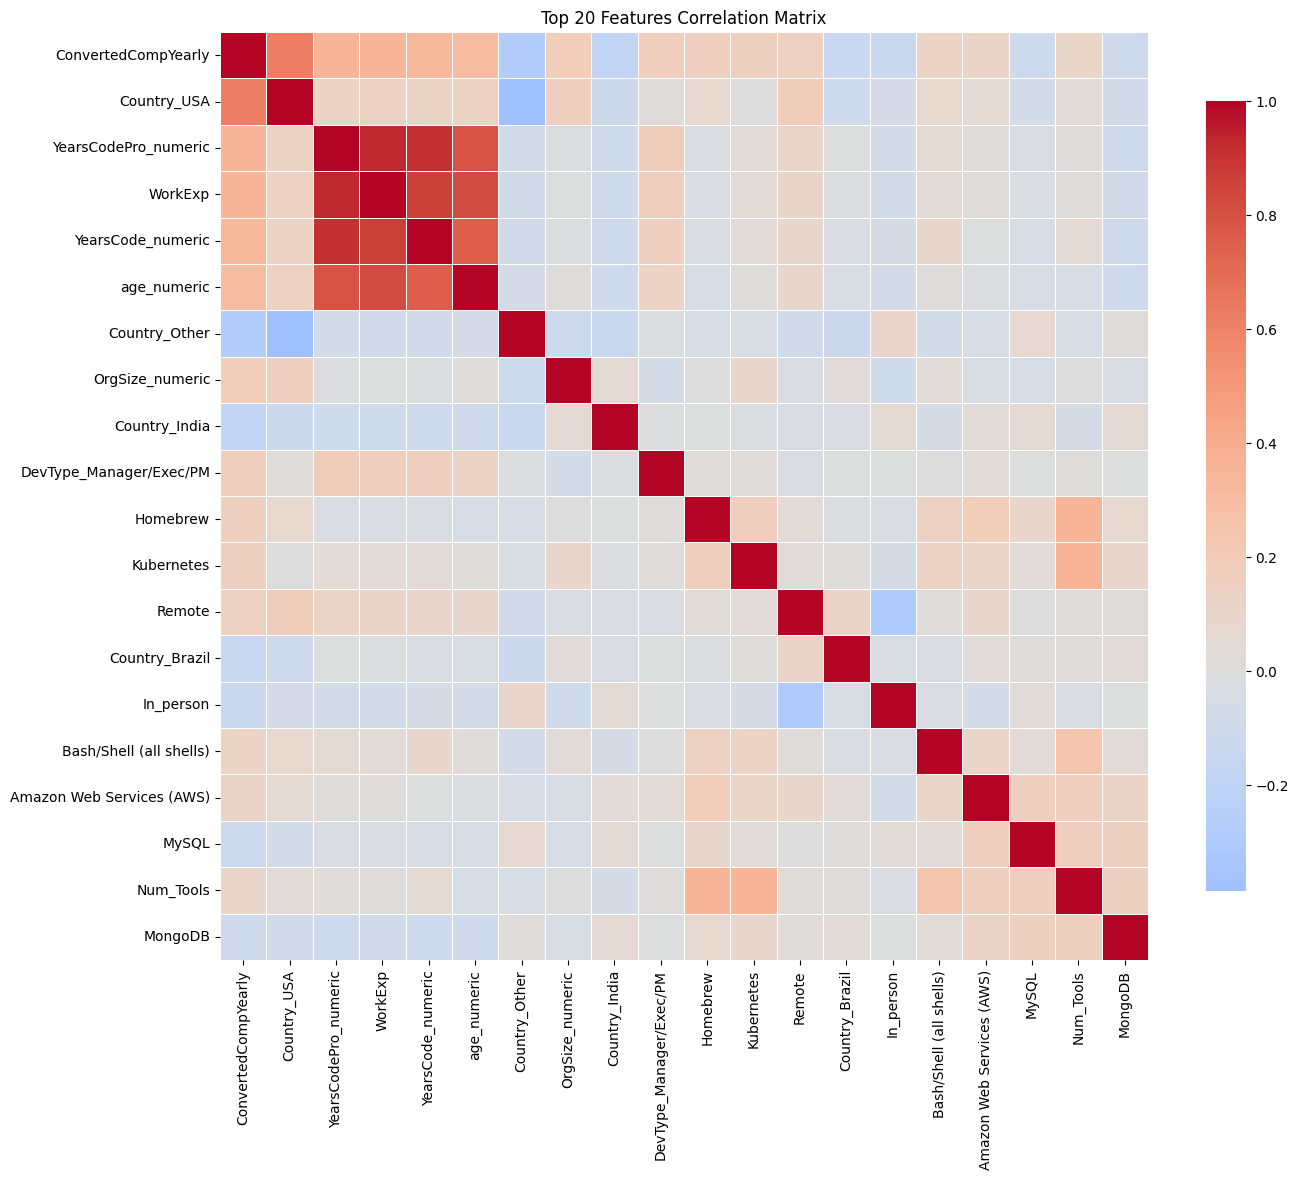

In [79]:
# Supprimer les colonnes trop corrélées entre elles
corr_matrix = df_model11.corr()
corr_matrix

seuil = 0.8
matrice_trop_correlees = []

for i in range(len(corr_matrix.columns)):
    for j in range(i) :
        corr = corr_matrix.iloc[i,j]
        if abs(corr) > seuil:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            matrice_trop_correlees.append((col1, col2, corr))

# Affichage
if matrice_trop_correlees:
    print("Colonnes très corrélées (> 0.8) :")
    for c1, c2, c in matrice_trop_correlees:
        print(f"{c1} <-> {c2} : {c:.3f}")
else:
   print("Aucune forte corrélation trouvée.")

# Top 20 features par corrélation absolue avec la cible
top_20_features = corr_matrix['ConvertedCompYearly'].abs().sort_values(ascending=False).head(20).index.tolist()

# Matrice de corrélation des top 20
top_corr = corr_matrix.loc[top_20_features, top_20_features]

# Heatmap lisible
plt.figure(figsize=(14,12))
sns.heatmap(top_corr, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Top 20 Features Correlation Matrix')
plt.tight_layout()
plt.show()

In [80]:
# On garde qu'une seule colonne sur celles très corrolées
df_model11 = df_model11.drop([
    'age_numeric',
    'MainBranch_notdev',
    'Hybrid',
    'YearsCode_numeric',
    'YearsCodePro_numeric'
], axis=1)

In [81]:
# Calculer la corrélation de chaque feature numérique avec la cible
for col in df_model11.columns:
    if col != 'ConvertedCompYearly':
        corr = df_model11[col].corr(df_model11['ConvertedCompYearly'])
        print(col, corr)

WorkExp 0.3456495828872681
Num_Languages 0.07366769453638766
Num_Databases -0.0044146316585892695
Num_Platforms -0.008910607831993675
Num_Webframes -0.058868182152501884
Num_Tools 0.10687384487658498
Total_Skills 0.04058114019440057
JavaScript 0.005218833970694756
SQL 0.019555519504083546
HTML/CSS -0.009391587627659955
TypeScript 0.02414977810566183
Python 0.07795791316280144
Bash/Shell (all shells) 0.12779694112922552
C# -0.0013932503368097083
Java -0.005403289129748346
PostgreSQL 0.03138213294954421
MySQL -0.11110741102423737
SQLite -0.022815338355215795
Microsoft SQL Server -0.025806691405993048
Redis 0.055058229673874935
MongoDB -0.10041431568575226
Amazon Web Services (AWS) 0.11446068485646724
Microsoft Azure 0.0017217789525277648
Google Cloud 0.03484995868368433
React 0.07090481188193185
Node.js -0.02252496504522194
Docker 0.0592470980702767
npm -0.01920802931502294
Homebrew 0.16041531842970075
Kubernetes 0.15157340316145915
Pip 0.04343320127854972
Yarn 0.013417056327946934
Webpa

In [82]:
# On supprime les colonnes dont la correlation ne dépasse pas seuil

# Liste des colonnes fortes : seuil > 0.01
strong_cols = []

for col in df_model11.columns:
    if col != 'ConvertedCompYearly':
        corr = df_model11[col].corr(df_model11['ConvertedCompYearly'])
        if abs(corr) >= 0.01:
            strong_cols.append(col)

print(strong_cols)

['WorkExp', 'Num_Languages', 'Num_Webframes', 'Num_Tools', 'Total_Skills', 'SQL', 'TypeScript', 'Python', 'Bash/Shell (all shells)', 'PostgreSQL', 'MySQL', 'SQLite', 'Microsoft SQL Server', 'Redis', 'MongoDB', 'Amazon Web Services (AWS)', 'Google Cloud', 'React', 'Node.js', 'Docker', 'npm', 'Homebrew', 'Kubernetes', 'Pip', 'Yarn', 'Webpack', 'edlevel_numeric', 'Employment_numeric', 'MainBranch_dev', 'In_person', 'Remote', 'No', 'Yes', 'Advertising', 'Financial', 'Healthcare', 'HigherEd', 'IT', 'Manufacturing', 'OilGas', 'Other_industry', 'Wholesale', 'DevType_Back-end', 'DevType_Data/ML/DevOps', 'DevType_Front-end', 'DevType_Full-stack', 'DevType_Manager/Exec/PM', 'DevType_Mobile/Desktop/Embedded', 'DevType_Other', 'Country_Australia', 'Country_Brazil', 'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Netherlands', 'Country_Other', 'Country_Poland', 'Country_Spain', 'Country_Sweden', 'Country_USA', 'OrgSize_numeric']


In [83]:
X_final = df_model11[strong_cols]
print(X_final.shape)
y = df_model11['ConvertedCompYearly']
y.shape

(6031, 63)


(6031,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, train_size=0.8, shuffle=True, random_state=42
)

reg = LinearRegression().fit(X_train, y_train)

r2_train = reg.score(X_train, y_train)

y_pred_train = reg.predict(X_train) 

mae_train = mean_absolute_error(y_train, y_pred_train)
print("Train :", r2_train, mae_train)

Train : 0.5677090995821256 30002.151055062935


In [85]:
"""
y_predict = reg.predict(X_test)
pourcentage = (y_predict == y_test).sum() / len(y_test)

# Compare directement chaque prédiction à la valeur réelle, mais
# pour des variables continues comme le salaire, c’est quasiment 
toujours 0,
# donc cette approche n’est pas adaptée.
"""

# A la place n calcule R2 et MAE
"""
R² indique combien de la variation des salaires le modèle explique 
(1 = parfait, 0 = pas mieux que la moyenne), et MAE est la moyenne 
des différences absolues entre salaires réels et prédits 
(plus petit = prédictions plus proches)
"""
# r2_test = reg.score(X_test, y_test)
# autre méthode pour r2_test
y_predict = reg.predict(X_test)
r2_test = r2_score(y_test, y_predict)

mae_test = mean_absolute_error(y_test, y_predict)
print("Test :", r2_test, mae_test)

Test : 0.5690458172122137 30334.71195959616


### Résultats du modèle

- **Train** :  
  - R² = 0.567 → le modèle explique ~57% de la variance des salaires  
  - MAE = 30002 $ → l’erreur moyenne absolue sur les prédictions est d’environ 30 000 dollars

- **Test** :  
  - R² = 0.569 → performance similaire sur les données non vues  
  - MAE = 30 334 $ → l’erreur moyenne reste proche de celle de l’entraînement  

**Interprétation** : le modèle prédit assez bien les salaires en moyenne et ne semble pas surapprendre.


In [86]:
# on analyse les coefficients de magnitude pour connaitre l'influence de chaque colonne
print(reg.coef_)
for col, c in zip(X_final.columns, reg.coef_): 
    print(col,":", float(c))

[  1911.88861182    220.45494847  -2138.12060384   -447.100663
    227.738943    -1558.39651505   4365.22831408   1307.27267861
   1048.28449223   -633.50300014  -6801.08210646  -1092.40021486
  -7331.27350539   6137.74057593  -3259.64575344   5365.08153569
   2938.8786934    5791.18649616  -2904.41474012   1329.359504
  -1177.38966712   9675.71069391  11435.7909105     619.73346974
   2619.15072815   1604.49630616   2681.59746881   5795.89431724
   3681.60923533  -4232.48228079    951.97618561   3887.75770219
   3612.10238928   9284.03417717  13776.16210484   2416.71614941
 -15749.1342414    6786.37232862  -1693.70292635    833.88533227
   6105.37887327  -9647.0022765   -2627.09462846     81.3920492
  -6005.99184047  -5835.61246388  22923.99947865  -9404.12476083
    867.43216581   4397.29759496 -48708.27872444   3211.707026
 -30233.11639112 -13903.20333314 -53883.59137449 -40405.79004806
 -20009.40366714 -24222.72156406 -31673.69127589 -25373.71837132
 -24128.23988459  62828.06614002

In [87]:
# on va ordonner les valeurs
coef_croissant = pd.Series(reg.coef_, index=X_final.columns).sort_values()
for name, val in coef_croissant.items(): 
    print(name, ":", val)

Country_India : -53883.59137449248
Country_Brazil : -48708.27872443873
Country_Italy : -40405.79004805606
Country_Poland : -31673.691275891637
Country_France : -30233.1163911216
Country_Spain : -25373.71837132215
Country_Other : -24222.721564058986
Country_Sweden : -24128.239884590355
Country_Netherlands : -20009.403667135677
HigherEd : -15749.134241403359
Country_Germany : -13903.203333141482
Wholesale : -9647.002276499728
DevType_Mobile/Desktop/Embedded : -9404.124760829174
Microsoft SQL Server : -7331.273505394097
MySQL : -6801.082106458125
DevType_Front-end : -6005.991840473143
DevType_Full-stack : -5835.612463879697
In_person : -4232.482280789027
MongoDB : -3259.6457534434157
Node.js : -2904.414740120632
DevType_Back-end : -2627.0946284624442
Num_Webframes : -2138.1206038405217
Manufacturing : -1693.7029263504846
SQL : -1558.396515049517
npm : -1177.3896671243328
SQLite : -1092.4002148615982
PostgreSQL : -633.50300013927
Num_Tools : -447.1006629995063
DevType_Data/ML/DevOps : 81.3

Explications des résultats obtenus :
- Les valeurs autour de 0 n'influencent que peu le modèle. 
- Les valeurs positives influencent le salaire prédit positivement.
- Les valeurs négatives influencent le salaire prédit négativement.

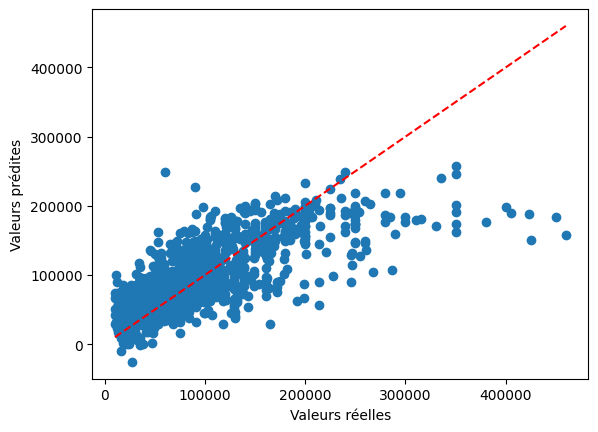

In [88]:
plt.scatter(y_test, y_predict)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale
plt.show()

### Nuage prédictions vs valeurs réelles

Le scatter montre les valeurs prédites (`y_predict`) en fonction des valeurs réelles (`y_test`), et la diagonale rouge en pointillés représente la ligne parfaite où prédit = réel.  
Plus les points sont proches de cette diagonale, meilleur est le modèle ; les écarts indiquent des erreurs de prédiction.  
On peut ainsi visualiser globalement la précision et détecter les sous- ou sur-prédictions.


### Observations sur les outliers

On remarque que les salaires élevés à partir de 300000 USD sont souvent sous-estimés par le modèle, certains points réels autour de 300000 étant prédits vers 200000, ce qui montre qu’il a du mal avec les valeurs extrêmes (outliers).

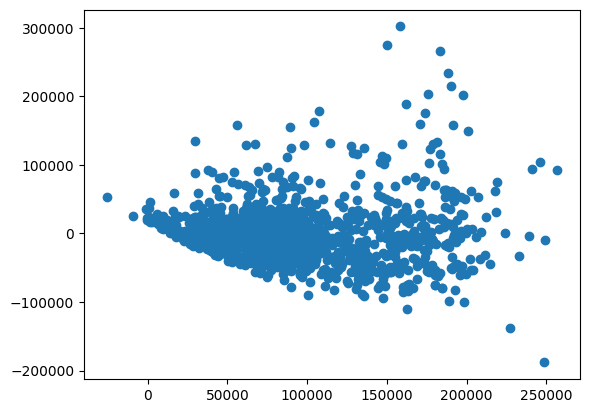

In [89]:
# les résidus
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)

### Analyse des résidus

Dans une régression, les **résidus** représentent la différence entre les valeurs observées et les valeurs prédites par le modèle :

**Résidu = Valeur observée − Valeur prédite**

1. **Valeurs centrées autour de 0 :**  
   - Si les résidus sont **aléatoirement répartis autour de zéro**, cela indique que le modèle n’a **pas de biais systématique** et prédit globalement correctement les valeurs.

2. **Observation dans le graphique :**  
   - Les résidus deviennent **négatifs pour les prédictions élevées**.  
   - Comme `Résidu = Observé − Prédit`, un résidu négatif signifie que **la valeur prédite est supérieure à la valeur observée**, donc le modèle **sur-estime les hauts salaires**.

3. **Conclusion :**  
   - Un bon modèle devrait avoir des résidus **homogènes et centrés autour de zéro** sur toute la plage de prédictions.  
   - Ici, la structure observée montre que le modèle **ne gère pas correctement les hauts revenus**, ce qui suggère d’améliorer le modèle avec :
     - Une transformation des variables,
     - Un modèle plus flexible capable de mieux prédire les valeurs extrêmes.
 valeurs extrêmes.
es salaires élevés.


In [90]:
# Erreur par tranche de salaire
bins = y_test.quantile([0, 0.25, 0.5, 0.75, 1]).values
salary_band = pd.cut(y_test, bins=bins, include_lowest=True)
#print(salary_band)

error_by_band = pd.DataFrame({'SalaryBand': salary_band, 'Error': residuals})
#print(error_by_band.columns)
print(list(error_by_band.columns))

grouped = error_by_band.groupby(salary_band, observed=True)
# agg(['mean','std','count']) donne juste les stats principales, 
# describe() donne toutes les stats descriptives.
# band_summary = grouped['Error'].describe()
band_summary = grouped['Error'].agg(['mean', 'std', 'count'])
print(band_summary)

['SalaryBand', 'Error']
                              mean           std  count
ConvertedCompYearly                                    
(10099.999, 48190.0] -17583.302844  24216.311378    304
(48190.0, 75000.0]   -12330.919391  27425.956807    302
(75000.0, 125190.0]   -5742.540689  33926.080343    299
(125190.0, 460000.0]  37688.833253  59033.162186    302


Le modèle surévalue les salaires bas (moyennes négatives des erreurs) et sous-estime les salaires élevés (moyenne positive), avec une variabilité des erreurs qui augmente avec le salaire.

## Résumé

Dans ce projet, j’ai construit un modèle de machine learning pour prédire les salaires des développeurs à partir de données d’enquête.

- J’ai nettoyé et préparé des données à grande échelle en gérant les valeurs manquantes et les valeurs aberrantes.
- J’ai créé de nouvelles variables à partir de colonnes multi-choix et encodé les variables catégorielles.
- J’ai réduit la multicolinéarité et sélectionné des variables pertinentes pour la modélisation.
- J’ai entraîné un modèle de régression linéaire et évalué ses performances selon différentes tranches de salaire.
- J’ai analysé l’impact des compétences, des rôles et des caractéristiques des entreprises sur les salaires.

Ce projet m’a permis de mieux comprendre toutes les étapes d’un projet de data science, du prétraitement des données à l’interprétation des résultats.


## Prochaines étapes

Les prochaines étapes de ce projet pourraient inclure :

- Tester des modèles non linéaires comme Random Forest ou Gradient Boosting afin de capturer des relations plus complexes et mieux prédire les hauts salaires.
- Créer des variables d’interaction, par exemple en combinant des compétences et des rôles (ex. : Python × Data Scientist), pour analyser l’impact de certaines combinaisons.
- Expérimenter avec différentes décisions sur les données : supprimer le plafond de salaire, utiliser l’imputation au lieu de supprimer les valeurs manquantes, ou ajouter des informations géographiques plus précises (ville/région plutôt que pays).
- Concevoir des supports adaptés aux utilisateurs : guide compétences-salaire pour les apprenants, tableau de bord géographique pour les recruteurs, ou rapport « facteurs contrôlables vs fixes » pour l’orientation de carrière.
- Rendre le projet prêt pour un portfolio en améliorant l’analyse, la documentation et en mettant en avant les résultats les plus pertinents.

Ces améliorations permettront d’augmenter la qualité du modèle et la valeur pratique du projet.


In [91]:
from sklearn.ensemble import RandomForestRegressor


# regr = RandomForestRegressor(n_estimators=100, random_state=42)
# Résultat
# Train :  0.9364170562557048 11428.394510779437
# Test :  0.5686171675668206 30575.92216238608
regr = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=5, random_state=42)
regr.fit(X_train, y_train)

y_pred_train_rf = regr.predict(X_train)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
print("Train : ", r2_train_rf, mae_train_rf)

y_pred_rf = regr.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Test : ", r2_score_rf, mae_rf)

Train :  0.784231622122477 20429.61308869788
Test :  0.5648042076558923 30457.791769848372
